In [ ]:
import experimenting
import event_library as el
import torch
from matplotlib import pyplot as plt
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d
from experimenting.utils.skeleton_helpers import Skeleton

In [2]:
hw = el.utils.get_hw_property('dvs')

In [8]:
h3mcore = experimenting.dataset.HumanCore('test', '/data/gscarpellini/dataset/human3.6m/constant_count', '/data/gscarpellini/dataset/human3.6m/constant_count/3d_joints.npz', 'cross-subject', 1, test_cams=[1, 3], test_subjects=[1])

No handles with labels found to put in legend.


{'subject': 1, 'action': 'WalkDog 1', 'cam': 1, 'frame': '0000043'}


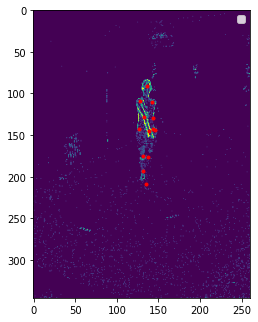

In [92]:
idx = 100000
print(h3mcore.frames_info[idx+1])
sk, intr, extr = h3mcore.get_joint_from_id(idx)
frame = h3mcore.get_frame_from_id(idx)
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
#plot_skeleton_3d(sk)
plot_skeleton_2d(frame.squeeze(), joints)

No handles with labels found to put in legend.


{'subject': 5, 'action': 'Walking', 'cam': 0, 'frame': '0000437'}


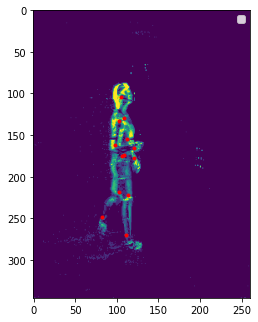

In [83]:
idx = 200200
print(h3mcore.frames_info[idx+1])
sk, intr, extr = h3mcore.get_joint_from_id(idx)
frame = h3mcore.get_frame_from_id(idx)
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
#plot_skeleton_3d(sk)
plot_skeleton_2d(frame.squeeze(), joints)

In [6]:
from experimenting.dataset.factory import Joints3DConstructor

In [9]:
train, val, test = Joints3DConstructor().get_datasets(h3mcore, {'apply':{}}, {'apply':{}})
print(f"{len(train)}, {len(val)}, {len(test)}")

168697, 42175, 138288


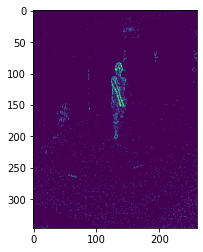

In [21]:
x, y = test[100000]
plt.imshow(x)

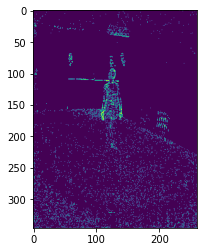

In [13]:
plt.imshow(x)

In [18]:
# DHP19 Core

In [39]:
dhp19core = experimenting.dataset.DHP19Core(**{"name": "timecount_dhp19",
  "base_path": "/data/gscarpellini/dhp19/time_count_dataset",
  "data_dir": "/data/gscarpellini/dhp19/time_count_dataset/movements_per_frame",
  "hm_dir": "/data/gscarpellini/dhp19/time_count_dataset/labels",
  "labels_dir": "/data/gscarpellini/dhp19/time_count_dataset/labels",
  "joints_dir": "/data/gscarpellini/dhp19/time_count_dataset/labels_full_joints",
"preload_dir": None,
  "n_classes": 33,
  "test_subjects": [1, 2, 3, 4, 5],
  "movements": None,
  "cams": [0,1,2,3],
  "test_cams": [1, 2],
  "n_channels": 1,
  "n_joints": 13,
  "partition": "cross-view",
  "torso_length": 453.5242317})


In [40]:
train, val, test = Joints3DConstructor().get_datasets(dhp19core, {'apply':{}}, {'apply':{}})
print(f"{len(train)}, {len(val)}, {len(test)}")

140344, 35086, 175430


In [7]:
import os
import numpy as np
files = sorted(os.listdir("../scripts/h3m/out/S11/Posing 1.54138969/"))

In [21]:
!pip install imageio-ffmpeg

     |████████████████████████████████| 26.9 MB 293 kB/s eta 0:00:01     |███████████████████████████████▏| 26.2 MB 8.1 MB/s eta 0:00:01


Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (260, 346) to (272, 352) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
fig = plt.figure()
for i in files:
    img = np.load("../scripts/h3m/out/S11/Posing 1.54138969/" + i).astype()
    frames.append(img)

import imageio; 
from IPython.display import Video; 
imageio.mimwrite('test2.mp4', frames, fps=30); 
Video('test2.mp4', width=480, height=360)

Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (260, 346) to (272, 352) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to

<Figure size 432x288 with 0 Axes>

In [26]:
frames[10].max()

255